# Install Required Libraries

In [3]:
!pip install torch matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# Upload the Dataset

In [4]:
from google.colab import files
uploaded = files.upload()

Saving HouseData_CA_Complete.csv to HouseData_CA_Complete.csv


#  Load the Dataset

In [5]:
import pandas as pd

# Load the uploaded file
file_path = list(uploaded.keys())[0]
house_data = pd.read_csv(file_path)

# Display the first few rows and dataset info
house_data.head()
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26563 entries, 0 to 26562
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   property_url      26563 non-null  object
 1   property_id       26563 non-null  object
 2   listing_id        26563 non-null  object
 3   mls               26563 non-null  object
 4   mls_id            26563 non-null  object
 5   status            26563 non-null  object
 6   text              21606 non-null  object
 7   style             26563 non-null  object
 8   full_street_line  26431 non-null  object
 9   street            26411 non-null  object
 10  unit              6809 non-null   object
 11  city              26562 non-null  object
 12  state             26563 non-null  object
 13  zip_code          26557 non-null  object
 14  beds              16258 non-null  object
 15  full_baths        16082 non-null  object
 16  half_baths        3810 non-null   object
 17  sqft        

# Data Cleaning

In [6]:
def clean_numeric_column(column):
    return pd.to_numeric(column.replace('[^0-9.]', '', regex=True), errors='coerce')

In [7]:
house_data['list_price'] = clean_numeric_column(house_data['list_price'])
house_data['sqft'] = clean_numeric_column(house_data['sqft'])
house_data['price_per_sqft'] = clean_numeric_column(house_data['price_per_sqft'])

# Handling Missing values

In [8]:
house_data['list_price'].fillna(house_data['list_price'].median(), inplace=True)
house_data['sqft'].fillna(house_data['sqft'].median(), inplace=True)
house_data['price_per_sqft'].fillna(house_data['price_per_sqft'].median(), inplace=True)

<ipython-input-8-adbff8eb8fc6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_data['list_price'].fillna(house_data['list_price'].median(), inplace=True)
<ipython-input-8-adbff8eb8fc6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [9]:
house_data[['list_price', 'sqft', 'price_per_sqft']].describe()

,list_price,sqft,price_per_sqft
count,2.656300e+04,26563.000000,26563.000000
mean,7.095839e+03,1688.173926,4.212815
std,5.464016e+04,1573.831142,50.073987
min,7.000000e+00,100.000000,0.000000
25%,3.600000e+03,1303.000000,3.000000
50%,4.200000e+03,1430.000000,3.000000
75%,5.000000e+03,1595.000000,4.000000
max,5.200000e+06,78352.000000,4559.000000


# Feature Normalization

In [10]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = house_data[['list_price', 'sqft', 'price_per_sqft']].values

# Normalize using StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Convert to PyTorch Tensor

In [11]:
import torch

# Convert to PyTorch tensor
data_tensor = torch.tensor(normalized_features, dtype=torch.float32)
data_tensor.shape

torch.Size([26563, 3])

# Implementation of K-Means Algorithm Using PyTorch

In [12]:
def kmeans_pytorch(data, k, max_iters=100, tol=1e-4):
    # Randomly initialize centroids
    indices = torch.randperm(data.size(0))[:k]
    centroids = data[indices]

    for iteration in range(max_iters):
        # Step 1: Assign clusters based on closest centroid
        distances = torch.cdist(data, centroids)
        cluster_labels = torch.argmin(distances, dim=1)

        # Step 2: Calculate new centroids as the mean of assigned points
        new_centroids = torch.stack([data[cluster_labels == j].mean(0) for j in range(k)])

        # Check for convergence
        if torch.norm(new_centroids - centroids) < tol:
            print(f"Converged at iteration {iteration}")
            break
        centroids = new_centroids

    return cluster_labels, centroids


# Run K-Means with 3 Clusters

In [13]:
# Run K-Means clustering
k = 3  # Number of clusters
labels, centroids = kmeans_pytorch(data_tensor, k)

# Convert labels and centroids to NumPy for visualization
labels = labels.numpy()
centroids = centroids.numpy()


Converged at iteration 55


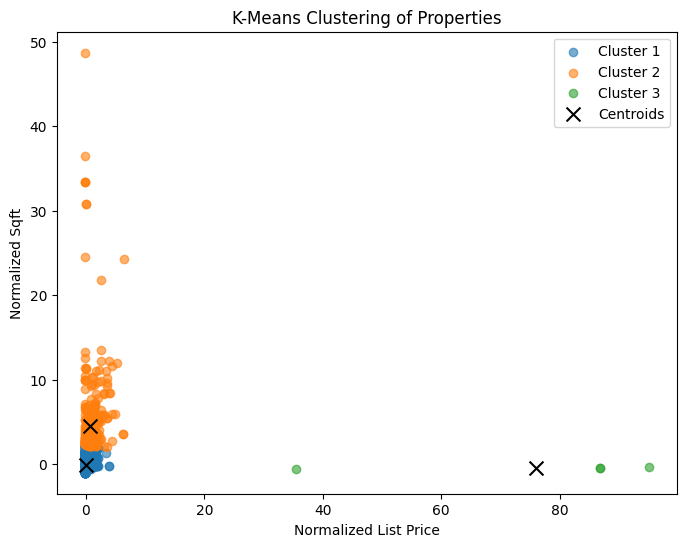

In [14]:
import matplotlib.pyplot as plt

# Scatter plot with cluster labels
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = normalized_features[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', alpha=0.6)

# Mark centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.xlabel('Normalized List Price')
plt.ylabel('Normalized Sqft')
plt.legend()
plt.title('K-Means Clustering of Properties')
plt.show()


# K-Means Clustering Plot (Without Outliers)

In [18]:
# Calculate IQR for outlier detection
Q1 = house_data[['list_price', 'sqft']].quantile(0.25)
Q3 = house_data[['list_price', 'sqft']].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = house_data[
    (house_data['list_price'] >= lower_bound['list_price']) &
    (house_data['list_price'] <= upper_bound['list_price']) &
    (house_data['sqft'] >= lower_bound['sqft']) &
    (house_data['sqft'] <= upper_bound['sqft'])
]

# Normalize features again
features_filtered = filtered_data[['list_price', 'sqft', 'price_per_sqft']].values
normalized_filtered = scaler.fit_transform(features_filtered)

# Convert to PyTorch tensor
data_tensor_filtered = torch.tensor(normalized_filtered, dtype=torch.float32)


Converged at iteration 17


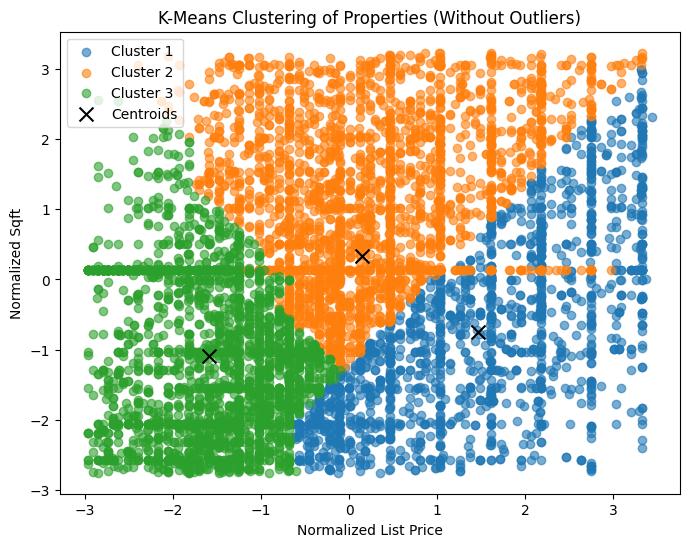

In [19]:
# Run K-Means on the filtered data
k = 3
labels_filtered, centroids_filtered = kmeans_pytorch(data_tensor_filtered, k)

# Convert to NumPy
labels_filtered = labels_filtered.numpy()
centroids_filtered = centroids_filtered.numpy()

# Visualize the clusters again
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = normalized_filtered[labels_filtered == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', alpha=0.6)

# Mark centroids
plt.scatter(centroids_filtered[:, 0], centroids_filtered[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.xlabel('Normalized List Price')
plt.ylabel('Normalized Sqft')
plt.legend()
plt.title('K-Means Clustering of Properties (Without Outliers)')
plt.show()


# Correlation Heatmap of House Features

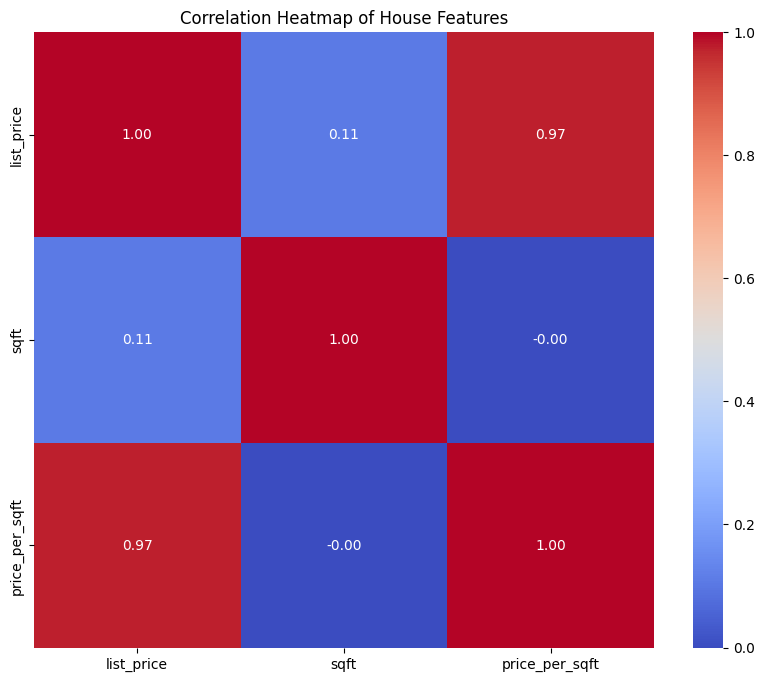

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'house_data' is your DataFrame
# Select the numeric columns you want in the heatmap
numeric_features = house_data[['list_price', 'sqft', 'price_per_sqft']]

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of House Features')
plt.show()

# Interpretation

In [21]:
# Set thresholds to interpret strong correlations
high_positive_corr = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix < 1.0)]
high_negative_corr = correlation_matrix[(correlation_matrix < -0.7)]

print("Strong Positive Correlations:")
print(high_positive_corr.dropna(how='all'))

print("\nStrong Negative Correlations:")
print(high_negative_corr.dropna(how='all'))


Strong Positive Correlations:
                list_price  sqft  price_per_sqft
list_price             NaN   NaN        0.973007
price_per_sqft    0.973007   NaN             NaN

Strong Negative Correlations:
Empty DataFrame
Columns: [list_price, sqft, price_per_sqft]
Index: []


# Analyzing the Characteristics of Each Cluster

In [22]:
from sklearn.cluster import KMeans

# Assuming house_data contains the relevant features
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(house_data[['list_price', 'sqft', 'price_per_sqft']])

# Attach cluster labels to the DataFrame
house_data['cluster'] = labels



In [23]:
# Group by clusters and compute summary statistics
cluster_summary = house_data.groupby('cluster').agg(
    avg_list_price=('list_price', 'mean'),
    avg_sqft=('sqft', 'mean'),
    avg_price_per_sqft=('price_per_sqft', 'mean'),
    count=('list_price', 'count')
)

# Display the cluster characteristics
print(cluster_summary)


         avg_list_price     avg_sqft  avg_price_per_sqft  count
cluster                                                        
0          5.824807e+03  1650.496479            3.543355  26410
1          4.900000e+06  1107.000000         4440.666667      3
2          1.330242e+05  8333.540000           33.353333    150


In [24]:
print(house_data.columns)


Index(['property_url', 'property_id', 'listing_id', 'mls', 'mls_id', 'status',
       'text', 'style', 'full_street_line', 'street', 'unit', 'city', 'state',
       'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built',
       'days_on_mls', 'list_price', 'list_price_min', 'list_price_max',
       'list_date', 'sold_price', 'last_sold_date', 'assessed_value',
       'estimated_value', 'new_construction', 'lot_sqft', 'price_per_sqft',
       'latitude', 'longitude', 'neighborhoods', 'county', 'fips_code',
       'stories', 'hoa_fee', 'parking_garage', 'agent_id', 'agent_name',
       'agent_email', 'agent_phones', 'agent_mls_set', 'agent_nrds_id',
       'broker_id', 'broker_name', 'builder_id', 'builder_name', 'office_id',
       'office_mls_set', 'office_name', 'office_email', 'office_phones',
       'nearby_schools', 'primary_photo', 'alt_photos', 'cluster'],
      dtype='object')


# Identifying Undervalued Properties

In [25]:
from sklearn.cluster import KMeans

# Run K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(house_data[['list_price', 'sqft', 'price_per_sqft']])

# Assign cluster labels to the DataFrame
house_data['cluster'] = labels


In [26]:
# Calculate the cluster-wise average price per sqft
cluster_avg_price_per_sqft = house_data.groupby('cluster')['price_per_sqft'].mean()

# Define the threshold as 85% of the cluster average
thresholds = cluster_avg_price_per_sqft * 0.85


In [27]:
# Identify undervalued properties
undervalued_properties = house_data[
    house_data['price_per_sqft'] < thresholds[house_data['cluster']].values
]

# Display some undervalued properties
undervalued_properties[['list_price', 'sqft', 'price_per_sqft', 'cluster']].head()


,list_price,sqft,price_per_sqft,cluster
1,4200.0,1430.0,3.0,0
3,4500.0,1660.0,3.0,0
4,5000.0,2000.0,3.0,0
5,2300.0,1430.0,3.0,0
6,4200.0,1430.0,3.0,0


In [28]:
house_data[house_data['cluster'] == 0].describe()


,sqft,list_price,price_per_sqft,cluster
count,26410.000000,26410.000000,26410.000000,26410.0
mean,1650.496479,5824.806778,3.543355,0.0
std,1422.131113,6418.804041,2.060530,0.0
min,100.000000,7.000000,0.000000,0.0
25%,1300.000000,3600.000000,3.000000,0.0
50%,1430.000000,4200.000000,3.000000,0.0
75%,1576.000000,4957.250000,4.000000,0.0
max,78352.000000,69000.000000,65.000000,0.0


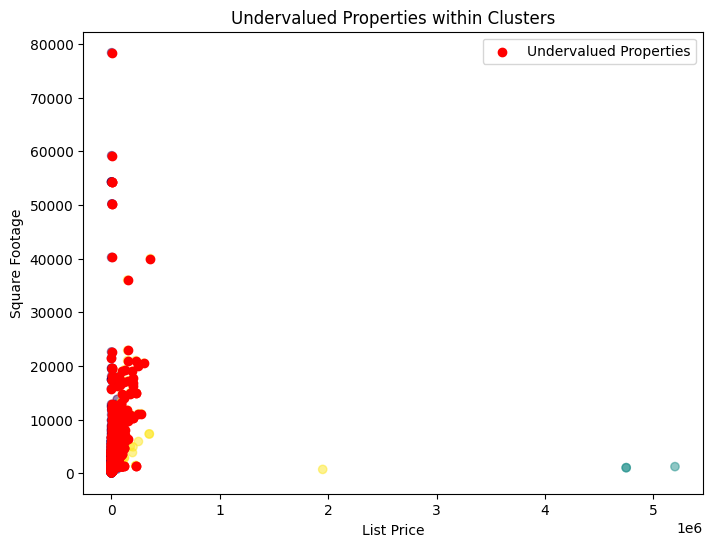

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(house_data['list_price'], house_data['sqft'], c=house_data['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(undervalued_properties['list_price'], undervalued_properties['sqft'], color='red', label='Undervalued Properties')
plt.xlabel('List Price')
plt.ylabel('Square Footage')
plt.legend()
plt.title('Undervalued Properties within Clusters')
plt.show()


# Gaussian Mixture Models - Clustering

In [32]:
!pip install scikit-learn matplotlib


In [33]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Select relevant features for GMM clustering
features = house_data[['list_price', 'sqft', 'price_per_sqft']].values

# Apply GMM with 3 components (clusters)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(features)

# Attach cluster labels to the dataset
house_data['gmm_cluster'] = gmm_labels


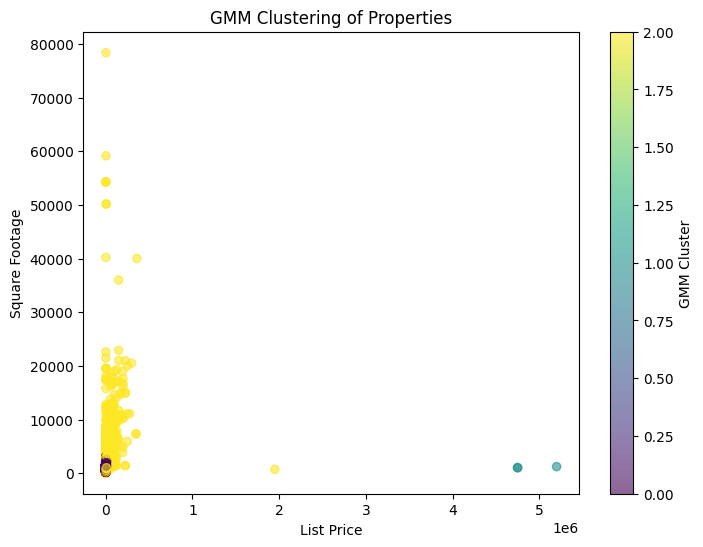

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(house_data['list_price'], house_data['sqft'], c=house_data['gmm_cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='GMM Cluster')
plt.xlabel('List Price')
plt.ylabel('Square Footage')
plt.title('GMM Clustering of Properties')
plt.show()


# Removing Outliers Using IQR

In [41]:
# Calculate IQR for list price and square footage
Q1 = house_data[['list_price', 'sqft']].quantile(0.25)
Q3 = house_data[['list_price', 'sqft']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter properties within bounds
filtered_data = house_data[
    (house_data['list_price'] >= lower_bound['list_price']) &
    (house_data['list_price'] <= upper_bound['list_price']) &
    (house_data['sqft'] >= lower_bound['sqft']) &
    (house_data['sqft'] <= upper_bound['sqft'])
]


# Application of Log Transformation

In [42]:
import numpy as np

# Log-transform the list price
filtered_data['log_list_price'] = np.log1p(filtered_data['list_price'])


<ipython-input-42-61f7358dd2f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_list_price'] = np.log1p(filtered_data['list_price'])


# Visualizing GMM Clusters(Without Outliers)

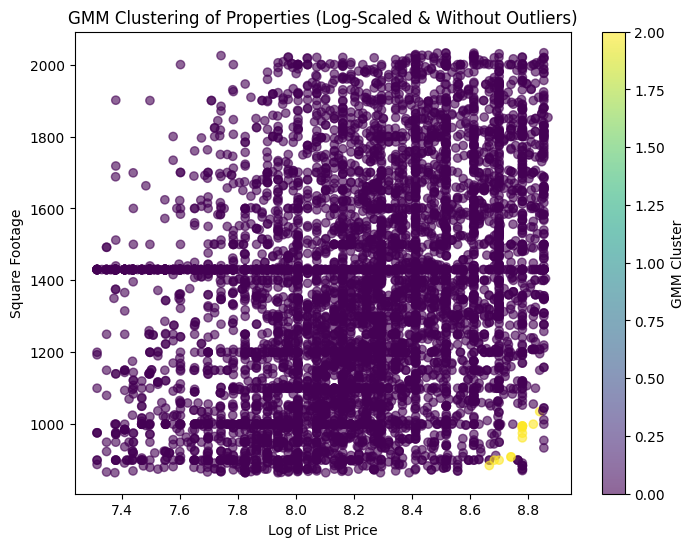

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['log_list_price'], filtered_data['sqft'], c=filtered_data['gmm_cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='GMM Cluster')
plt.xlabel('Log of List Price')
plt.ylabel('Square Footage')
plt.title('GMM Clustering of Properties (Log-Scaled & Without Outliers)')
plt.show()


# Recomputing GMM with Filtered Data

<ipython-input-44-aa8745a30f87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['gmm_cluster'] = filtered_labels


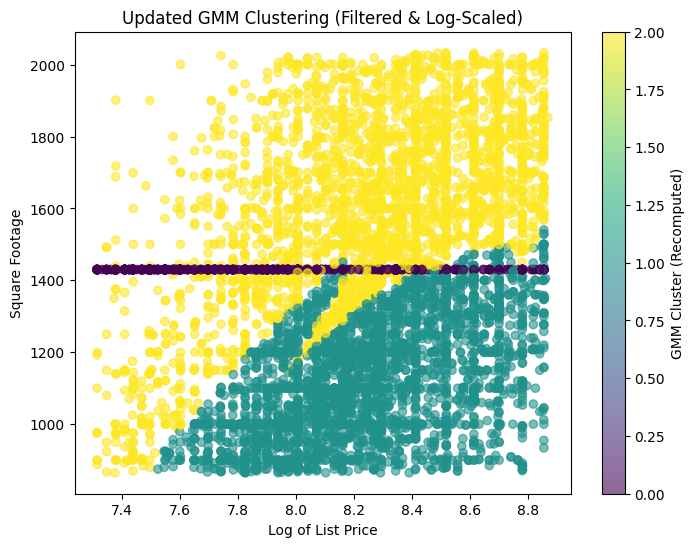

In [44]:
from sklearn.mixture import GaussianMixture

# Recompute GMM with 3 clusters
gmm_filtered = GaussianMixture(n_components=3, random_state=42)
filtered_labels = gmm_filtered.fit_predict(filtered_data[['log_list_price', 'sqft', 'price_per_sqft']])

# Assign new labels to the filtered dataset
filtered_data['gmm_cluster'] = filtered_labels

# Visualize again with updated clusters
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['log_list_price'], filtered_data['sqft'], c=filtered_data['gmm_cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='GMM Cluster (Recomputed)')
plt.xlabel('Log of List Price')
plt.ylabel('Square Footage')
plt.title('Updated GMM Clustering (Filtered & Log-Scaled)')
plt.show()


# Cluster Summary

In [45]:
# Group by GMM clusters and compute summary statistics
cluster_summary = filtered_data.groupby('gmm_cluster').agg(
    avg_log_list_price=('log_list_price', 'mean'),
    avg_list_price=('list_price', 'mean'),
    avg_sqft=('sqft', 'mean'),
    avg_price_per_sqft=('price_per_sqft', 'mean'),
    count=('list_price', 'count')
)

print("Cluster Characteristics:")
print(cluster_summary)


Cluster Characteristics:
             avg_log_list_price  avg_list_price     avg_sqft  \
gmm_cluster                                                    
0                      8.314891     4122.080047  1430.000000   
1                      8.248076     3989.306134  1128.015556   
2                      8.256739     4108.547195  1610.431353   

             avg_price_per_sqft  count  
gmm_cluster                             
0                      3.000000  11056  
1                      3.518051   3407  
2                      2.563366   3030  


# Identifying Undervalued Properties Within Each Cluster

In [46]:
# Calculate cluster-wise average price per sqft
cluster_avg_price_per_sqft = filtered_data.groupby('gmm_cluster')['price_per_sqft'].mean()

# Define threshold as 85% of the cluster average
thresholds = cluster_avg_price_per_sqft * 0.85

# Identify undervalued properties
undervalued_properties = filtered_data[
    filtered_data['price_per_sqft'] < thresholds[filtered_data['gmm_cluster']].values
]

# Display the first few undervalued properties
undervalued_properties[['list_price', 'sqft', 'price_per_sqft', 'gmm_cluster']].head()


,list_price,sqft,price_per_sqft,gmm_cluster
8,4700.0,1898.0,2.0,2
9,2200.0,1000.0,2.0,1
11,3100.0,1324.0,2.0,1
20,2850.0,1158.0,2.0,1
42,2600.0,1185.0,2.0,1


# Visualizing Clusters with Undervalued Properties

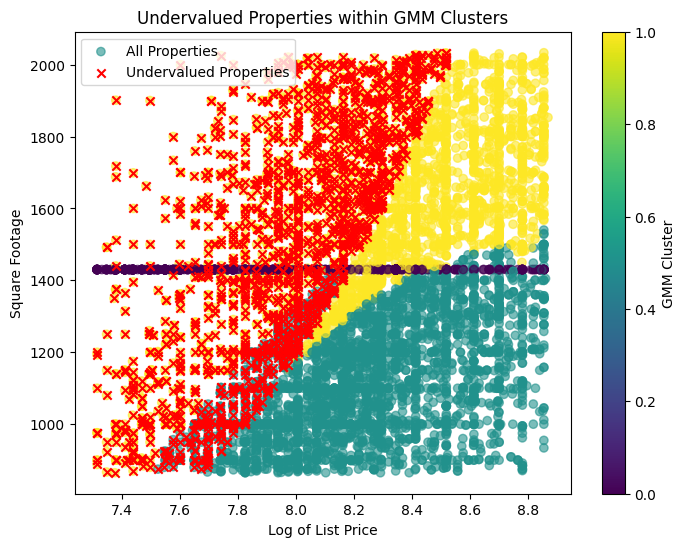

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['log_list_price'], filtered_data['sqft'], c=filtered_data['gmm_cluster'], cmap='viridis', alpha=0.6, label='All Properties')
plt.scatter(undervalued_properties['log_list_price'], undervalued_properties['sqft'], color='red', marker='x', label='Undervalued Properties')
plt.colorbar(label='GMM Cluster')
plt.xlabel('Log of List Price')
plt.ylabel('Square Footage')
plt.legend()
plt.title('Undervalued Properties within GMM Clusters')
plt.show()
